In [174]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd

# Задача 1

Даны значения величины заработной платы заемщиков банка *(salary)* и значения их поведенческого кредитного скоринга *(scoring)*:

$$salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]$$
$$scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]$$

Возьмём в качестве признака значение *salary*, а в качестве целевой переменной - *scoring*.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

0. Постройте *scatter plot* по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

0. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

0. Оцените построенное уравнение регрессии с помощью $F$-критерия Фишера.

0. Постройте для коэффициентов регрессии доверительные интервалы с помощью $t$-статистики Стьюдента.


In [62]:
x = np.array([35,45,190,200,40,70,54,150,120,110])
y = np.array([401,574,874,919,459,739,653,902,746,832])

Коэффициенты для парной регрессии:

In [9]:
b1 = ((y*x).mean()-y.mean()*x.mean())/((x**2).mean()-x.mean()**2)
b1

2.620538882402765

In [12]:
b0 = y.mean()-b1*x.mean()
b0

444.1773573243596

Коэффициенты с помощью метода наименьших квадратов:

In [105]:
X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)
ones = np.ones((len(X), 1))
X = np.hstack((ones, X))

In [106]:
XTX = X.T.dot(X)
XTX = np.linalg.inv(XTX).dot(X.T).dot(Y)
XTX

array([[444.17735732],
       [  2.62053888]])

In [107]:
b0 = XTX[0][0]
b0

444.17735732435926

In [108]:
b1 = XTX[1][0]
b1

2.620538882402767


$$b_0 = 444.17, b_1 = 2.62$$

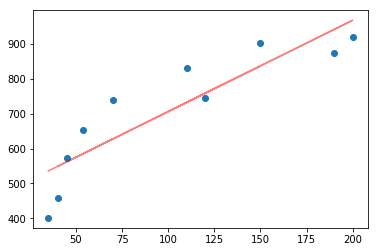

In [109]:
plt.scatter(x, y)
plt.plot(x, b0+b1*x, c="red", alpha = 0.5)

Модель линейной регрессии:

In [110]:
z = b0 + b1*x

Дисперсия модели:

In [111]:
D_model = np.var(z)
D_model

23998.475798823372

Дисперсия реальных данных:

In [112]:
D_y = np.var(y)
D_y

30468.890000000007

Коэффициент детерминации:

In [113]:
R2 = D_model/D_y
R2

0.7876386635293694

In [114]:
np.corrcoef(x,y)[0][1]**2

0.7876386635293682

Ошибка апроксимации:

In [115]:
A = np.abs((y - z) / y).mean()
A

0.11469251843561709

Статистика для оценки с помощью $F-$критерия Фишера:

In [121]:
k1 = 1
k2 = len(y) - 2
NK=k2/k1
T = R2**2/(1-R2**2)*NK
T

13.073409088886452

Критическое значения для $F$-критерия Фишера:

In [123]:
alpha = 0.05

F_crit = ss.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714


Так как $T>F_{crit}$ то модель статистически значима.

Для построения доверительного интвервала для $b_1$ найдем $S_{slope}$ и $t$:

In [197]:
alpha = 0.05
n=len(y)
S_slope = np.sqrt(((y-z)**2).sum()/((n-2)*((x-x.mean())**2).sum()))
S_slope


0.4810827956851601

In [138]:
t = ss.t.ppf(1-alpha, df = n-2)
t

1.8595480375228424

Доверительный интервал для $b_1$:

In [145]:
b1_ = np.array([b1-t*S_slope, b1+t*S_slope])
b1_

array([1.72594231, 3.51513545])

Для построения доверительного интвервала для $b_0$ найдем $S_{intercept}$:

In [142]:
S_intercept = S_slope*np.sqrt((x**2).sum()/n)
S_intercept

56.46649755068154

Доверительный интервал для $b_0$:

In [147]:
b0_ = np.array([b0-t*S_intercept, b0+t*S_intercept])
b0_

array([339.17519262, 549.17952203])


# Задача 2

Допустим, первые $5$ клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?



С помощью однофакторного дисперсионного анализа проверим гипотезу $H_0$, что место проживания влияет на уровень кредитного скоринга, т.е. что средние значения скоринга для Москвы и Санкт-Петербурга равны.

Разобьем выборку:

In [156]:
x1 = x[:5]a
y1 = y[:5]
n1 = len(y1)
y2 = y[5:]
x2 = x[5:]
n2 = len(y2)

Посчитаем $S^2_F$ и $S^2_{res}$:

In [158]:
S2F = (y1.mean()-y.mean())**2*n1 + (y2.mean()-y.mean())**2*n2
S2F

41602.5

In [168]:
S2res = (((y1-y1.mean())**2).sum() + ((y2-y2.mean())**2).sum()).sum()
S2res

263086.39999999997

Найдем несмещенные оценки дисперсий и значения $k1$,$k2$

In [165]:
k1 = 1
k2 = 10-2

sigma2F=S2F/k1
sigma2res = S2res/k2

Найдем статистику

In [166]:
T=sigma2F/sigma2res
T

1.2650596914169643

Найдем критическую область:

In [167]:
alpha = 0.05
t = ss.f.ppf(1-alpha, k1, k2)
t

5.317655071578714

Так как $T<F$, можно сделать вывод, что гипотеза должна быть отвергнута, значит проживание не влияет на величину скоринга.

# Задача 3

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [175]:
df = pd.read_csv("anscombe_dataset.csv")

In [199]:
df.head()

,id,x1,y1,x2,y2,x3,y3,x4,y4
0,0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [187]:
def b1(x,y):
    b1 = ((y*x).mean()-y.mean()*x.mean())/((x**2).mean()-x.mean()**2)
    return b1

In [188]:
def b0(x,y,b1):
    b0 = y.mean()-b1*x.mean()
    return b0

Посчитаем коэффициенты $b_0$ и $b_1$ для каждых пар $x$ и $y$

In [191]:
x1 = df.x1
y1 = df.y1
b1_1 = b1(x1, y1)
b0_1 = b0(x1, y1, b1_1)
b1_1, b0_1

(0.5000909090909076, 3.0000909090909245)

In [192]:
x2 = df.x2
y2 = df.y2
b1_2 = b1(x2, y2)
b0_2 = b0(x2, y2, b1_2)
b1_2, b0_2

(0.5, 3.000909090909091)

In [193]:
x3 = df.x3
y3 = df.y3
b1_3 = b1(x3, y3)
b0_3 = b0(x3, y3, b1_3)
b1_3, b0_3

(0.49972727272727013, 3.0024545454545697)

In [195]:
x4 = df.x4
y4 = df.y4
b1_4 = b1(x4, y4)
b0_4 = b0(x4, y4, b1_4)
b1_4, b0_4

(0.4999090909090924, 3.0017272727272584)

Очевидно, они равны